In [ ]:
import torch
import torch.nn as nn
from torchvision.datasets import CocoDetection


In [2]:
images_root = '../../datasets/coco2017/images'
val_ann = '../../datasets/coco2017/annotations/instances_val2017.json'
transform = None

target_transform = None
val_dataset = CocoDetection(root=images_root, annFile=val_ann, transform=transform,
                            target_transform=target_transform)

loading annotations into memory...
Done (t=0.26s)
creating index...
index created!


In [22]:
x = torch.randn(10, 5, 4)
y = torch.randn(4,)
y.expand_as(x).shape

torch.Size([10, 5, 4])

Image dimensions: (640, 425)


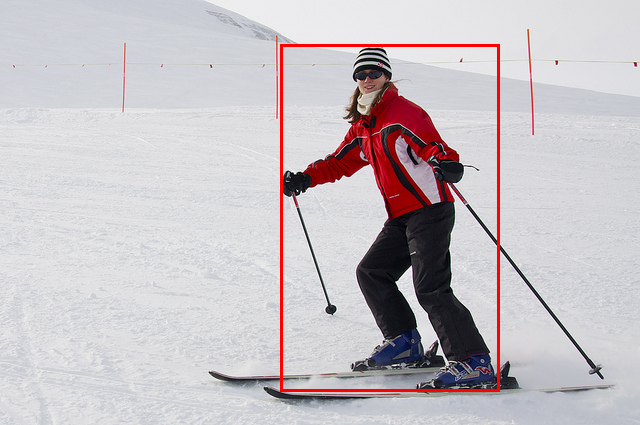

In [18]:
img, info = val_dataset[5]
bbox = info[0]['bbox']

print(f"Image dimensions: {img.size}")

# Draw bounding box on the image
from PIL import ImageDraw

# Create a copy of the image to draw on
img_with_bbox = img.copy()
draw = ImageDraw.Draw(img_with_bbox)

# COCO bbox format is [x, y, width, height]
x, y, width, height = bbox
# Draw rectangle (x, y, x+width, y+height)
draw.rectangle([x, y, x+width, y+height], outline='red', width=3)

# Display the image with bounding box
img_with_bbox

In [16]:
for item in val_dataset[5][1]:
    print(item['bbox'])

[280.79, 44.73, 218.7, 346.68]
[205.34, 362.21, 409.72, 38.2]


In [28]:
img.size

(640, 425)

In [27]:
import torchvision

to_tensor = torchvision.transforms.ToTensor()
x = to_tensor(img)
x.shape

torch.Size([3, 425, 640])